In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Dataset path
dataset_path = 'dataset'

categories = ['biodegradable', 'non_biodegradable']
data = []
labels = []

# Image size
img_size = (128, 128)  # Resize all images to same size

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    label = categories.index(category)  # 0 for biodegradable, 1 for non_biodegradable
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            data.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")


In [4]:
print(f"Total images loaded: {len(data)}")
print(f"Labels found: {set(labels)}")

Total images loaded: 50
Labels found: {0, 1}


In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!{sys.executable} -m pip install scikit-learn

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!{sys.executable} -m pip install scikit-learn

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

# Dummy example
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("X_train:", X_train)
print("X_test:", X_test)


X_train: [[7 8]
 [3 4]
 [1 2]]
X_test: [[5 6]]


In [12]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import os
import cv2
import numpy as np

# Dataset folder ka path
dataset_folder = "dataset"

# Class names = folder ke naam
categories = os.listdir(dataset_folder)

data = []
labels = []

# Har folder ke andar images ko read karo
for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_folder, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize for consistency
            data.append(img)
            labels.append(idx)
        except:
            print(f"Error reading {img_path}")


Error reading dataset\non_biodegradable\battery.avif


NotADirectoryError: [WinError 267] The directory name is invalid: 'dataset\\test_image.jpg'

In [15]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2

In [17]:
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    class_num = categories.index(category)

    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            image = cv2.imread(img_path)
            if image is None:
                print(f"Skipped (can't read): {img_path}")
                continue
            resized = cv2.resize(image, (img_size, img_size))
            data.append(resized)
            labels.append(class_num)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

Error processing dataset\biodegradable\animal waste.jpg: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type

Error processing dataset\biodegradable\apple core.jpg: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type

Error processing dataset\biodegradable\banana peel.jpg: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type
>  - Can't parse 'dsize'. Sequence item with index 0 has a wrong type

Error processing dataset\biodegradable\broken_twigs.webp: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'resiz

NotADirectoryError: [WinError 267] The directory name is invalid: 'dataset\\test_image.jpg'

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert lists to numpy arrays
X = np.array(data)
y = np.array(labels)

# Normalize pixel values (0 to 1)
X = X / 255.0

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 39
Testing samples: 10


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN model define karna
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 output neuron for binary classification
])

# Model compile karna
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model ka summary dekhna
model.summary()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Model training
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.5948 - loss: 0.8444 - val_accuracy: 0.5000 - val_loss: 0.6657
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8699 - loss: 0.6686 - val_accuracy: 0.5000 - val_loss: 0.7200
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4573 - loss: 0.7367 - val_accuracy: 0.5000 - val_loss: 0.6785
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5048 - loss: 0.6614 - val_accuracy: 0.6000 - val_loss: 0.6790
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8178 - loss: 0.6203 - val_accuracy: 0.5000 - val_loss: 0.7017
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7286 - loss: 0.6062 - val_accuracy: 0.5000 - val_loss: 0.7028
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7353 - loss: 0.5830 - val_accuracy: 0.6000 - val_loss: 0.6530
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8833 - loss: 0.5487 - val_accuracy: 0.6000 - val_loss:

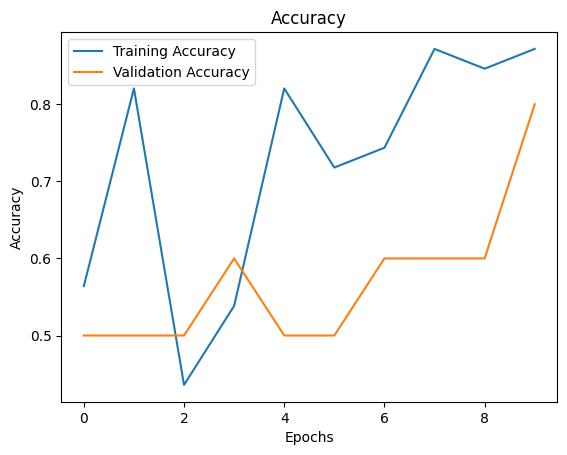

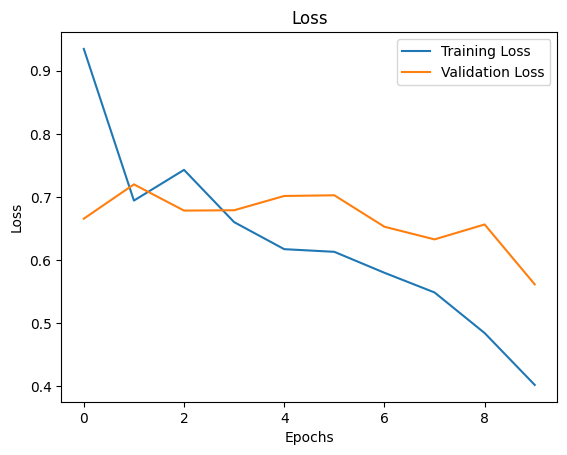

In [22]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Image ka path sahi likhna hai
img_path = 'dataset/test_image.jpg'

# 2. Image load karo aur size fix karo (64x64 agar training mein wahi size tha)
img = image.load_img(img_path, target_size=(64, 64))

# 3. Image ko numpy array mein convert karo
img_array = image.img_to_array(img)

# 4. Normalize karo (0-255 se 0-1)
img_array = img_array / 255.0

# 5. Batch dimension add karo (model ko batch chahiye hota hai)
img_array = np.expand_dims(img_array, axis=0)

# 6. Predict karo
prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Prediction: [[0.80494916]]


In [24]:
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print("Biodegradable")
else:
    print("Non-Biodegradable")

Biodegradable


In [25]:
prediction = model.predict(img_array)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Prediction: [[0.80494916]]


In [26]:
# Convert prediction to label
if prediction[0][0] > 0.5:
    print("Predicted Class: Biodegradable")
else:
    print("Predicted Class: Non-Biodegradable")


Predicted Class: Biodegradable


In [27]:
model.save("garbage_classification_model.h5")

In [28]:
model.save("garbage_classification_model.keras")

In [29]:
from tensorflow.keras.models import load_model
model = load_model("garbage_classification_model.keras")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8000 - loss: 0.5617
Test Accuracy: 80.00%


In [31]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

test_folder = "dataset/biodegradable"  # या non_biodegradable

for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    label = "Non-Biodegradable" if prediction[0][0] > 0.5 else "Biodegradable"
    print(f"{img_name}: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
animal waste.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
apple core.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
banana peel.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
broken_twigs.webp: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
cabbage.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
clothes.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
corn_husk.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
dry_leaves.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
egg_shell.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
fennel_leaves.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
fish_bones.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
food waste.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
green_chilli.jpg: Non-Biodegradable
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
leaves.jpg: Non-Biodeg

In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8000 - loss: 0.5617
Model Accuracy: 80.00%
